# Fatima Fellowship Quick Coding Challenge (Pick 1)

Thank you for applying to the Fatima Fellowship. To help us select the Fellows and assess your ability to do machine learning research, we are asking that you complete a short coding challenge. Please pick **1 of these 5** coding challenges, whichever is most aligned with your interests. 

**Due date: 1 week**

**How to submit**: Please make a copy of this colab notebook, add your code and results, and submit your colab notebook to the submission link below. If you have never used a colab notebook, [check out this video](https://www.youtube.com/watch?v=i-HnvsehuSw).

**Submission link**: https://airtable.com/shrXy3QKSsO2yALd3

# 1. Deep Learning for Vision

**Upside down detector**: Train a model to detect if images are upside down

* Pick a dataset of natural images (we suggest looking at datasets on the [Hugging Face Hub](https://huggingface.co/datasets?task_categories=task_categories:image-classification&sort=downloads))
* Synthetically turn some of images upside down. Create a training and test set.
* Build a neural network (using Tensorflow, PyTorch, or any framework you like)
* Train it to classify image orientation until a reasonable accuracy is reached
* [Upload the the model to the Hugging Face Hub](https://huggingface.co/docs/hub/adding-a-model), and add a link to your model below.
* Look at some of the images that were classified incorrectly. Please explain what you might do to improve your model's performance on these images in the future (you do not need to impelement these suggestions)

**Submission instructions**: Please write your code below and include some examples of images that were classified

In [31]:
### WRITE YOUR CODE TO TRAIN THE MODEL HERE

**Importing Important Libraries**

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torchvision import datasets,transforms   
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

In [33]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [34]:
import requests  
from PIL import Image  

In [35]:
transform_train=transforms.Compose([transforms.Resize((28,28)),  
                               transforms.RandomHorizontalFlip(),
                                
                               transforms.RandomRotation(10),  
                               transforms.RandomAffine(0,shear=10,scale=(0.8,1.2)),  
                               transforms.ColorJitter(brightness=0.2,contrast=0.2,saturation=0.2),  
                               transforms.ToTensor(),  
                               transforms.Normalize((0.5,),(0.5,))]) 

In [36]:
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01

In [37]:
train_set=datasets.MNIST(root='./data',train=True,download=True,transform=transform_train)  
test_set=datasets.MNIST(root='./data',train=False,download=True,transform=transforms.Compose([transforms.ToTensor()])) 
train_loader=torch.utils.data.DataLoader(dataset=train_set,batch_size=100,shuffle=True)  
test_loader=torch.utils.data.DataLoader(dataset=test_set,batch_size=100, shuffle=True)  

In [38]:
def output_label(label):
    output_mapping = {
                 0: "zero",
                 1: "one",
                 2: "two",
                 3: "three",
                 4: "four", 
                 5: "five", 
                 6: "Six",
                 7: "Seven",
                 8: "eight",
                 9: "nine"
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

**Playing with data and displaying some images using matplotlib imshow() method.**

In [39]:
a = next(iter(train_loader))
a[0].size()

torch.Size([100, 1, 28, 28])

Six, four, three, one, Six, Six, two, Six, one, two, one, one, three, eight, Six, four, four, three, zero, zero, five, nine, eight, Six, nine, three, five, one, five, four, eight, zero, two, two, zero, one, Six, two, Six, one, one, zero, three, zero, Seven, zero, Seven, two, four, four, one, five, eight, three, one, Seven, two, zero, Six, zero, zero, eight, eight, one, nine, five, three, Seven, five, eight, three, one, nine, Seven, nine, one, three, four, one, two, three, five, zero, eight, Six, two, zero, Seven, nine, zero, four, two, zero, five, two, nine, Six, eight, nine, zero, Six, four, three, one, Six, Six, two, Six, one, two, one, one, three, eight, Six, four, four, three, zero, zero, five, nine, eight, Six, nine, three, five, one, five, four, eight, zero, two, two, zero, one, Six, two, Six, one, one, zero, three, zero, Seven, zero, Seven, two, four, four, one, five, eight, three, one, Seven, two, zero, Six, zero, zero, eight, eight, one, nine, five, three, Seven, five, eight, 

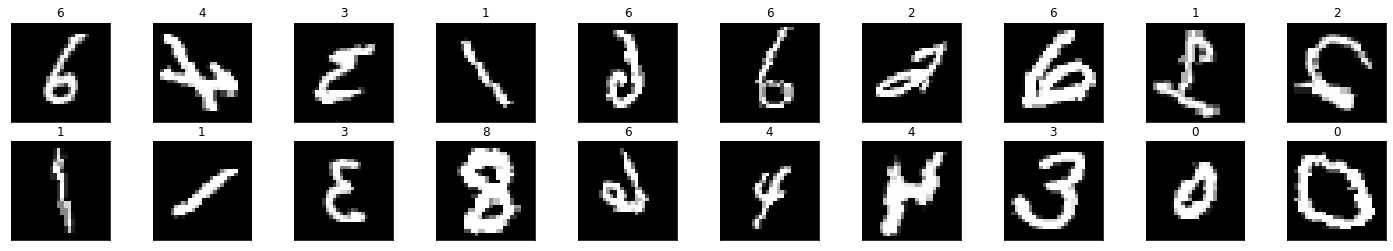

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))
    for i, label in enumerate(labels):
      print(output_label(label), end=", ")

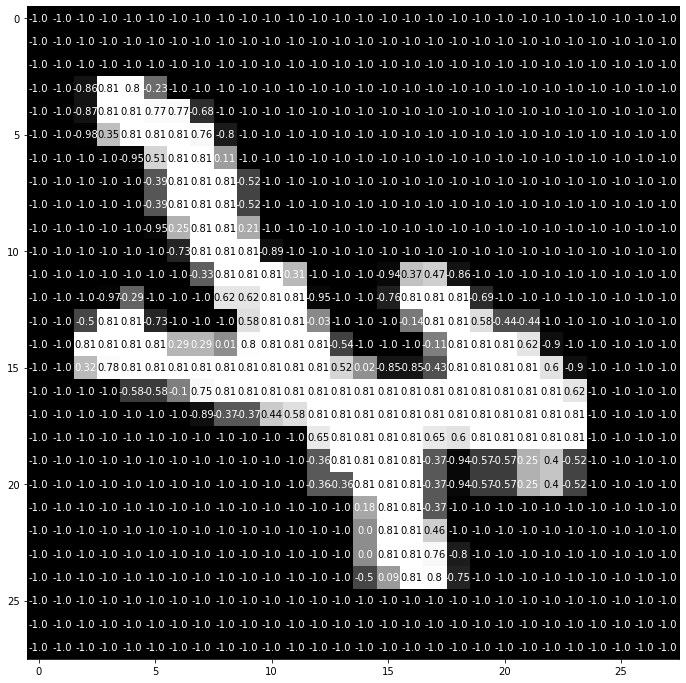

In [41]:
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

# ***Building a CNN**

-Make a model class (FashionCNN in our case)

  -  It inherit nn.Module class that is a super class for all the neural networks in Pytorch.

-Our Neural Net has following layers:

 -  Two Sequential layers each consists of following layers-

-  Convolution layer that has kernel size of 3 * 3, padding = 1 (zero_padding) in 1st layer and padding = 0 in second one. Stride of 1 in both layer.

-  Batch Normalization layer.

-  Acitvation function: ReLU.

-  Max Pooling layer with kernel size of 2 * 2 and stride 2.

     -  Flatten out the output for dense layer(a.k.a. fully connected layer).

     -  3 Fully connected layer with different in/out features.

     -  1 Dropout layer that has class probability p = 0.25.

-  All the functionaltiy is given in forward method that defines the forward pass of CNN.

-  Our input image is changing in a following way:

  -  First Convulation layer : input: 28 * 28 * 3, output: 28 * 28 * 32

  -  First Max Pooling layer : input: 28 * 28 * 32, output: 14 * 14 * 32
  -  Second Conv layer : input : 14 * 14 * 32, output: 12 * 12 * 64
  -  Second Max Pooling layer : 12 * 12 * 64, output: 6 * 6 * 64
  -  Final fully connected layer has 10 output features for 10 types of clothes.

In [42]:
class mnistCNN(nn.Module):
    
    def __init__(self):
        super(mnistCNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        
        return out


# Making a model of our CNN class¶
-  Creating a object(model in the code)
-  Transfering it into GPU if available.
-  Defining a Loss function. we're using CrossEntropyLoss() here.
-  Using Adam algorithm for optimization purpose.

In [43]:
model = mnistCNN()
model.to(device)

error = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

mnistCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


**Training the network and Testing it on test dataset**

In [44]:
num_epochs = 5
count = 0
# Lists for visualization of loss and accuracy 
loss_list = []
iteration_list = []
accuracy_list = []

# Lists for knowing classwise accuracy
predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        # Transfering images and labels to GPU if available
        images, labels = images.to(device), labels.to(device)
    
        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)
        
        # Forward pass 
        outputs = model(train)
        loss = error(outputs, labels)
        
        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()
        
        #Propagating the error backward
        loss.backward()
        
        # Optimizing the parameters
        optimizer.step()
    
        count += 1
    
    # Testing the model
    
        if not (count % 50):    # It's same as "if count % 50 == 0"
            total = 0
            correct = 0
        
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
            
                test = Variable(images.view(100, 1, 28, 28))
            
                outputs = model(test)
            
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
            
                total += len(labels)
            
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 500, Loss: 0.17253918945789337, Accuracy: 93.5%
Iteration: 1000, Loss: 0.26537787914276123, Accuracy: 94.86000061035156%
Iteration: 1500, Loss: 0.22996535897254944, Accuracy: 95.86000061035156%
Iteration: 2000, Loss: 0.12322244048118591, Accuracy: 96.7300033569336%
Iteration: 2500, Loss: 0.2548474967479706, Accuracy: 94.69000244140625%
Iteration: 3000, Loss: 0.1198360025882721, Accuracy: 96.12000274658203%


**Visualizing the Loss and Accuracy with Iterations**

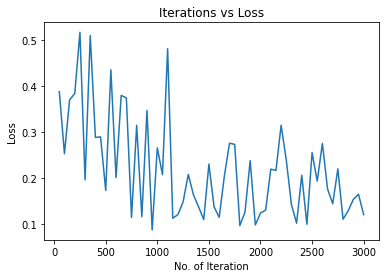

In [49]:
plt.plot(iteration_list, loss_list)
plt.xlabel("No. of Iteration")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

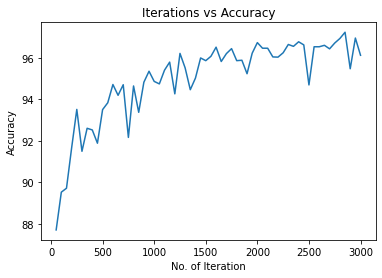

In [50]:
plt.plot(iteration_list, accuracy_list)
plt.xlabel("No. of Iteration")
plt.ylabel("Accuracy")
plt.title("Iterations vs Accuracy")
plt.show()

**Looking the Accuracy in each class of MNIST dataset**

In [51]:
class_correct = [0. for _ in range(10)]
total_correct = [0. for _ in range(10)]

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        test = Variable(images)
        outputs = model(test)
        predicted = torch.max(outputs, 1)[1]
        c = (predicted == labels).squeeze()
        
        for i in range(100):
            label = labels[i]
            class_correct[label] += c[i].item()
            total_correct[label] += 1
        
for i in range(10):
    print("Accuracy of {}: {:.2f}%".format(output_label(i), class_correct[i] * 100 / total_correct[i]))

Accuracy of zero: 96.43%
Accuracy of one: 98.77%
Accuracy of two: 98.45%
Accuracy of three: 92.38%
Accuracy of four: 99.39%
Accuracy of five: 93.72%
Accuracy of Six: 95.82%
Accuracy of Seven: 94.55%
Accuracy of eight: 96.00%
Accuracy of nine: 94.95%


**Printing the Confusion Matrix**

In [52]:
from itertools import chain 

predictions_l = [predictions_list[i].tolist() for i in range(len(predictions_list))]
labels_l = [labels_list[i].tolist() for i in range(len(labels_list))]
predictions_l = list(chain.from_iterable(predictions_l))
labels_l = list(chain.from_iterable(labels_l))

In [53]:
import sklearn.metrics as metrics

confusion_matrix(labels_l, predictions_l)
print("Classification report for CNN :\n%s\n"
      % (metrics.classification_report(labels_l, predictions_l)))

Classification report for CNN :
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     58800
           1       0.99      0.99      0.99     68100
           2       0.93      0.92      0.93     61920
           3       0.89      0.92      0.91     60600
           4       0.97      0.98      0.98     58920
           5       0.89      0.88      0.88     53520
           6       0.96      0.94      0.95     57480
           7       0.96      0.96      0.96     61680
           8       0.97      0.96      0.97     58440
           9       0.96      0.96      0.96     60540

    accuracy                           0.95    600000
   macro avg       0.95      0.95      0.95    600000
weighted avg       0.95      0.95      0.95    600000




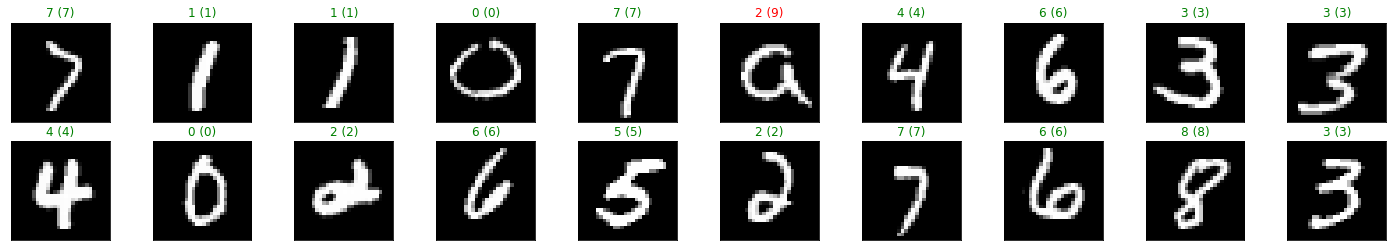

In [54]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

our model is performing excellently mainly because of the data augumentation done on the training data.

**Write up**: 
* Link to the model on Hugging Face Hub: 
* Include some examples of misclassified images. Please explain what you might do to improve your model's performance on these images in the future (you do not need to impelement these suggestions)


# 2. Deep Learning for NLP

**Fake news classifier**: Train a text classification model to detect fake news articles!

* Download the dataset here: https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset
* Develop an NLP model for classification that uses a pretrained language model
* Finetune your model on the dataset, and generate an AUC curve of your model on the test set of your choice. 
* [Upload the the model to the Hugging Face Hub](https://huggingface.co/docs/hub/adding-a-model), and add a link to your model below.
* *Answer the following question*: Look at some of the news articles that were classified incorrectly. Please explain what you might do to improve your model's performance on these news articles in the future (you do not need to impelement these suggestions)

In [45]:
### WRITE YOUR CODE TO TRAIN THE MODEL HERE

**Write up**: 
* Link to the model on Hugging Face Hub: 
* Include some examples of misclassified news articles. Please explain what you might do to improve your model's performance on these news articles in the future (you do not need to impelement these suggestions)

# 3. Deep RL / Robotics

**RL for Classical Control:** Using any of the [classical control](https://github.com/openai/gym/blob/master/docs/environments.md#classic-control) environments from OpenAI's `gym`, implement a deep NN that learns an optimal policy which maximizes the reward of the environment.

* Describe the NN you implemented and the behavior you observe from the agent as the model converges (or diverges).
* Plot the reward as a function of steps (or Epochs).
Compare your results to a random agent.
* Discuss whether you think your model has learned the optimal policy and potential methods for improving it and/or where it might fail.
* (Optional) [Upload the the model to the Hugging Face Hub](https://huggingface.co/docs/hub/adding-a-model), and add a link to your model below.


You may use any frameworks you like, but you must implement your NN on your own (no pre-defined/trained models like [`stable_baselines`](https://stable-baselines.readthedocs.io/en/master/)).

You may use any simulator other than `gym` _however_:
* The environment has to be similar to the classical control environments (or more complex like [`robosuite`](https://github.com/ARISE-Initiative/robosuite)).
* You cannot choose a game/Atari/text based environment. The purpose of this challenge is to demonstrate an understanding of basic kinematic/dynamic systems.

In [46]:
### WRITE YOUR CODE TO TRAIN THE MODEL HERE

**Write up**: 
* (Optional) link to the model on Hugging Face Hub: 
* Discuss whether you think your model has learned the optimal policy and potential methods for improving it and/or where it might fail.

# 4. Theory / Linear Algebra 

**Implement Contrastive PCA** Read [this paper](https://www.nature.com/articles/s41467-018-04608-8) and implement contrastive PCA in Python.

* First, please discuss what kind of dataset this would make sense to use this method on
* Implement the method in Python (do not use previous implementations of the method if they already exist)
* Then create a synthetic dataset and apply the method to the synthetic data. Compare with standard PCA.


**Write up**: Discuss what kind of dataset it would make sense to use Contrastive PCA

In [47]:
### WRITE YOUR CODE HERE

# 5. Systems

**Inference on the edge**: Measure the inference times in various computationally-constrained settings

* Pick a few different speech detection models (we suggest looking at models  on the [Hugging Face Hub](https://huggingface.co/models?pipeline_tag=automatic-speech-recognition&sort=downloads))
* Simulate different memory constraints and CPU allocations that are realistic for edge devices that might run such models, such as smart speakers or microcontrollers, and measure what is the average inference time of the models under these conditions 
* How does the inference time vary with (1) choice of model (2) available system memory (3) available CPU (4) size of input?

Are there any surprising discoveries? (Note that this coding challenge is fairly open-ended, so we will be considering the amount of effort invested in discovering something interesting here).

In [48]:
### WRITE YOUR CODE HERE

**Write up**: What surprising discoveries do you see?